# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.050116e+01     7.515528e+00
 * time: 0.005676984786987305
     1     2.824216e+01     5.011369e+00
 * time: 0.016541004180908203
     2     2.151507e+01     5.457033e+00
 * time: 0.0423738956451416
     3     1.396288e+01     1.703224e+00
 * time: 0.0736689567565918
     4     1.336884e+01     3.748163e+00
 * time: 0.09501194953918457
     5     1.256618e+01     1.863819e+00
 * time: 0.11619997024536133
     6     1.080738e+01     2.606515e+00
 * time: 0.13723182678222656
     7     1.001623e+01     1.009491e+00
 * time: 0.15821003913879395
     8     9.412298e+00     7.631043e-01
 * time: 0.1792440414428711
     9     9.042105e+00     6.402690e-01
 * time: 0.20017099380493164
    10     8.884447e+00     5.710039e-01
 * time: 0.22109484672546387
    11     8.849282e+00     1.783062e+00
 * time: 0.23719501495361328
    12     8.756901e+00     7.460005e-01
 * time: 0.2537078857421875
    13     8.709723e+00     7.438744e-01
 * time: 0

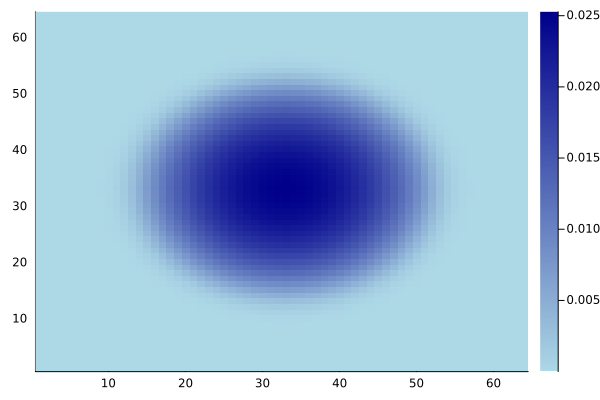

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)